In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NeighbourClustering import *

np.random.seed(1234)

In [2]:
## Parameters
N = 24
T = 200
c = 0.6  # 0.4   # 0.7
r = 1.4 # 0.5  # 0.7
p_loss = 0.5
exponent = 0 


In [3]:
def Flattened_to_2DIndex(Array, n):
    '''
    Array: 1d enumeration of a previously n x n shaped array
    n: integer with len(Array) == n*n
    '''
    assert(len(Array) == n*n)
    i_index = (Array/n).astype(int)
    j_index = Array%n
    output = np.empty((n*n,2))
    output[:,0] = i_index
    output[:,1] = j_index
    return(output)



def Sample_Agent_B(N_agents, Indices_A, Exponent = 2):
    '''
    N_agents: integer (number of agents)
    Indices_A: 2d integer array (kth row of this array gives the x/y coordinates of agent k)
    Exponent: Measures how much the probabiliy decreases with distance to choose the distant agent
    '''
    
    # create 2d enumeration and flatten it
    Enumeration = np.arange(0,N_agents*N_agents).reshape((N_agents,N_agents))
    FlatEnumeration = Enumeration.flatten()
    
    # transform the flattened enumeration to (i,j) indices of the 2d map
    indices = Flattened_to_2DIndex(FlatEnumeration, N_agents)

    # Calculate the L1 Distances from the Indices of A with boundary condition
    xA, yA =  Indices_A # agent A
    x,y = abs(indices - np.array((xA, yA)))[:,0], abs(indices - np.array((xA, yA)))[:,1] # distance to all other agents
    x = np.where(x <= -x+N_agents, x, -x+N_agents) # Boundary Condition
    y = np.where(y <= -y+N_agents, y, -y+N_agents)
    
    Norm  = np.where( x+y >0, x**Exponent + y**Exponent,0)
    Norm.reshape((N_agents,N_agents))
    # Safety check
    #ax = sns.heatmap(Norm.reshape((N_agents,N_agents)), linewidth=0.5)
    #plt.title("Distances")
    #plt.show()
    
    # Now create a list of only those indices that are not A! We want to select a DIFFERENT agent B!
    ListIndices_not_A = list(indices[Norm != 0])
    L = len(ListIndices_not_A)
    
    # Probabilities ~ 1/(Norm) as a model suggestion
    Prob = (1/Norm[Norm!=0]) 
    Prob = Prob/sum(Prob)
    chosen = np.random.choice(L, p = Prob)
    
    # returns the indices of an agent B with B!=A and (statistically) B close to A
    return(ListIndices_not_A[chosen])
    

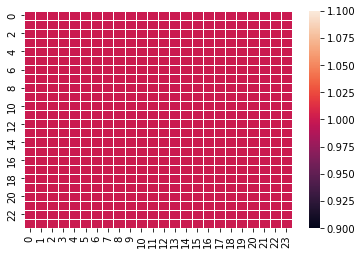

Time unit 0
Mean 1.4771624755301116
Median 0.9827911673700881
Number of contracts 403


Time unit 1
Mean 2.264094863902509
Median 0.9827911673700881
Number of contracts 323


Time unit 2
Mean 3.251573045227384
Median 0.9751259137484382
Number of contracts 287


Time unit 3
Mean 4.621092419107241
Median 0.9535460112219034
Number of contracts 274


Time unit 4
Mean 5.422896745296914
Median 0.9379173267266334
Number of contracts 299


Time unit 5
Mean 8.967889654035012
Median 0.9599067315729917
Number of contracts 282


Time unit 6
Mean 9.90332737659837
Median 0.9269808449251744
Number of contracts 306


Time unit 7
Mean 20.64834270256661
Median 1.0409706414594755
Number of contracts 307


Time unit 8
Mean 28.873530327620657
Median 1.1162254275883245
Number of contracts 292


Time unit 9
Mean 38.185208266186706
Median 1.1551931353925378
Number of contracts 284


Time unit 10
Mean 103.11902128018811
Median 1.3490403209288453
Number of contracts 278


Time unit 11
Mean 107.51763216301414
Me

Number of contracts 292


Time unit 94
Mean 3840932.984946499
Median 152.43237292635771
Number of contracts 286


Time unit 95
Mean 3684039.3768547457
Median 149.1440238713052
Number of contracts 291


Time unit 96
Mean 2125955.1708344007
Median 146.2890620968734
Number of contracts 297


Time unit 97
Mean 2069435.1980955733
Median 179.5846810687282
Number of contracts 270


Time unit 98
Mean 3797268.6561733163
Median 196.13701069701995
Number of contracts 282


Time unit 99
Mean 5113190.657194071
Median 234.07239923840194
Number of contracts 276


Time unit 100
Mean 5981564.754376754
Median 214.75715492383603
Number of contracts 323


Time unit 101
Mean 6732224.3270855835
Median 239.7456445286342
Number of contracts 277


Time unit 102
Mean 11012294.721795782
Median 238.0469462662033
Number of contracts 283


Time unit 103
Mean 19080882.53450987
Median 246.06736383191944
Number of contracts 295


Time unit 104
Mean 32474269.42022574
Median 224.9545028572046
Number of contracts 289


T

Time unit 187
Mean 57615022432340.875
Median 70366.61787852185
Number of contracts 256


Time unit 188
Mean 57616539087126.31
Median 74278.39151955883
Number of contracts 293


Time unit 189
Mean 9229866037554.594
Median 81684.99535672943
Number of contracts 270


Time unit 190
Mean 22136377717588.754
Median 102792.97244931562
Number of contracts 305


Time unit 191
Mean 22129785765900.26
Median 100897.05813170786
Number of contracts 297


Time unit 192
Mean 53098408088495.49
Median 109510.53570671976
Number of contracts 287


Time unit 193
Mean 53107235503519.336
Median 123242.10532189609
Number of contracts 280


Time unit 194
Mean 53108214482945.52
Median 132202.4115762771
Number of contracts 294


Time unit 195
Mean 53103245075513.3
Median 132183.29840083804
Number of contracts 261


Time unit 196
Mean 122333537161641.56
Median 145522.70002827665
Number of contracts 296


Time unit 197
Mean 122331151565132.44
Median 151556.26797807252
Number of contracts 290


Time unit 198
Mean 29

In [4]:
AgentsTimeSeries = np.ones((N,N,T+1))


Agents = np.ones((N,N))
AgentsTimeSeries[:,:,0] = Agents
ax = sns.heatmap(Agents, linewidth=0.5)
plt.show()
Controlagent = list([1])

cluster_top_timeseries = list()
cluster_bottom_timeseries = list()


for t in range(T):  # time units
    
    Contracts = list()
    Distances = list()
    
    for n in range(N*N): # time steps
        
        
        
        # A has the risk and wants to buy insurance
        i_A = np.random.randint(0,N)
        j_A = np.random.randint(0,N)
        
        # B is considering to sell the insurance and take on the risk
        chosenindex = Sample_Agent_B(N_agents = N, 
                                 Indices_A = np.array([i_A,j_A]).astype(int),
                                 Exponent = exponent).astype(int)
        i_B = chosenindex[0]
        j_B = chosenindex[1]
         
        w_A = Agents[i_A,j_A]
        w_B = Agents[i_B, j_B]
        G = r*w_A
        C = c*w_A
            
        F_max = w_A - ((w_A + G)**0.5) * ((w_A-C)**0.5)
        
        F_min = -w_B  + 0.5*np.sqrt(4*w_B**2 + (G+C)**2 ) + (C-G)/2.
        #print("A:",w_A, F_max)
        #print("B:", w_B, F_min)
        #print("\n")
        
        p = np.random.uniform(0,1)
        win = p>p_loss
        
        if (F_min >= F_max) or (w_B <= C): 
            # B demands more than A is willing to pay:
            # no contract
            
            if win:
                Agents[i_A, j_A] *= (1+r)
            else:
                Agents[i_A,j_A] *= (1-c)
                
                
        elif F_min < F_max and (w_B > C):
            # make a contract at midway fee
            F = 0.5*(F_min + F_max) 
            
            Agents[i_A,j_A] -= F 
            
            
            Contracts += [(i_A, j_A, i_B, j_B)]  # record the signed contract
            #Distances += [ (min(abs(i_B - i_A), N-abs(i_B - i_A))**exponent + min(abs(j_B-j_A),N-abs(j_B-j_A))**exponent )**(1./exponent)  ]
            #print(Contracts[-1])
            #print(F_min, F, F_max)
            #print(i_A, j_A, i_B, j_B)
            #print("\n")
            if win:
                Agents[i_B, j_B] += (F +  G)
            else:
                Agents[i_B, j_B] += (F-C)
            

    
    #### Now the Control Agent plays the game ####
    Control_new = Controlagent[-1]
    p = np.random.uniform(0,1)
    if p > p_loss:
        Controlagent.append(Control_new * (1+r))
    else:
        Controlagent.append(Control_new * (1-c))
        
    
    
    print("Time unit", t)
    print("Mean", np.mean(Agents))
    print("Median", np.median(Agents))
    #ax = sns.heatmap(Agents, linewidth=0.5)
    #ax = sns.heatmap(Agents>np.quantile(Agents,0.9), linewidth=0.5)  # Plot the extreme few %

    
    # Clustering    
    cluster_top_timeseries += [ClusteringRateNeighbour_import(Agents>np.quantile(Agents,0.9)).mean()]
    cluster_bottom_timeseries += [ClusteringRateNeighbour_import(Agents<=np.quantile(Agents,0.1)).mean()]
    
    
    
    # now plot the contracts of this time unit
    
    print("Number of contracts", len(Contracts))
    
    for Indices in Contracts:
        i1, j1, i2, j2 = Indices
        #print([j1,i1], [j2,i2])
    #    plt.plot([j1+0.5,j2+0.5], [i1+0.5,i2+0.5], c = "yellow", alpha =0.8)
    #i1, j1, i2, j2 = Contracts[-1]
    #print([j1,i1], [j2,i2])
    #plt.plot([j1+0.5,j2+0.5], [i1+0.5,i2+0.5], c = "white")
    
    
    #plt.show()
    #print("Mean Distance for Contract", np.mean(np.array(Distances)))
    print("\n")
    
    AgentsTimeSeries[:,:,t+1] = Agents

167550.03039740172
0.0172181975945747


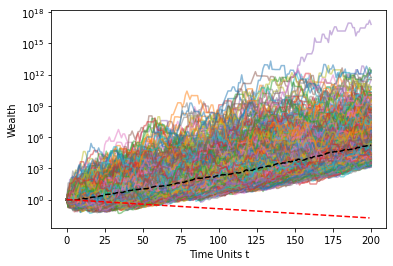

In [5]:
fig, ax = plt.subplots(1,1)
for i in range(N):
    for j in range(N):
        ax.semilogy(AgentsTimeSeries[i,j,:], alpha = 0.5)
        
medians = list()
for t in range(T+1):
    medians  += [np.median(AgentsTimeSeries[:,:,t])]
print(medians[-1])     # 1.659e-13
ax.semilogy(medians, c = "k", linestyle= "--")
ax.set_xlabel("Time Units t")
ax.set_ylabel("Wealth")
#ax.semilogy([0,T],[1,1], c="k")

# Expectation

TA = np.ones(T)
TA =  ((1-c)**(p_loss) * (1+r)**(1-p_loss))**np.arange(T)
ax.semilogy(TA, c="red", linestyle = "--", label="Individual Time Average")
#ax.semilogy(Controlagent, c="red", linestyle = ":", label="Controlagent")
print(TA[-1])
plt.show()


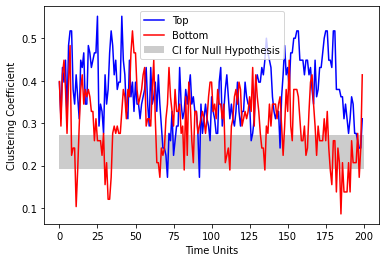

In [6]:
# Top_Clust
plt.axvspan(xmin= 0 ,xmax = len(cluster_top_timeseries), 
            ymin=0.25, ymax=0.41,  # Approximate Values
            alpha = 0.4, facecolor="grey",label="CI for Null Hypothesis")
plt.plot(cluster_top_timeseries, label="Top", c="blue")
plt.plot(cluster_bottom_timeseries, label="Bottom", c="red")
plt.xlabel("Time Units")
plt.ylabel("Clustering Coefficient")
plt.legend()

## Construct adjacency matrix

In [7]:
Contracts

[(23, 10, 4, 7),
 (15, 1, 20, 10),
 (9, 14, 8, 20),
 (21, 12, 4, 16),
 (11, 19, 8, 2),
 (13, 10, 16, 10),
 (12, 20, 13, 16),
 (12, 3, 6, 4),
 (6, 7, 8, 20),
 (1, 13, 20, 18),
 (13, 13, 16, 17),
 (8, 13, 6, 19),
 (7, 11, 16, 15),
 (19, 15, 3, 2),
 (11, 11, 7, 17),
 (20, 14, 20, 9),
 (5, 13, 22, 18),
 (23, 18, 16, 0),
 (3, 9, 22, 3),
 (1, 18, 2, 8),
 (2, 0, 1, 11),
 (2, 7, 9, 12),
 (5, 8, 8, 4),
 (16, 22, 10, 1),
 (21, 15, 7, 20),
 (19, 15, 16, 21),
 (18, 10, 10, 11),
 (4, 9, 12, 18),
 (14, 8, 0, 16),
 (5, 14, 11, 7),
 (7, 14, 20, 5),
 (12, 5, 4, 9),
 (17, 3, 21, 18),
 (15, 13, 17, 16),
 (13, 23, 7, 22),
 (9, 5, 18, 2),
 (6, 22, 3, 6),
 (21, 8, 23, 21),
 (23, 11, 3, 1),
 (1, 7, 3, 2),
 (7, 7, 6, 18),
 (7, 9, 0, 0),
 (19, 16, 15, 5),
 (5, 23, 17, 21),
 (14, 23, 0, 13),
 (5, 2, 0, 18),
 (7, 7, 8, 8),
 (13, 6, 11, 11),
 (19, 9, 6, 20),
 (9, 23, 14, 2),
 (14, 9, 18, 12),
 (11, 19, 6, 8),
 (12, 5, 11, 5),
 (19, 21, 12, 12),
 (4, 15, 8, 18),
 (13, 20, 4, 23),
 (16, 18, 15, 2),
 (6, 18, 8, 1),


In [8]:
for Indices in Contracts:
        i1, j1, i2, j2 = Indices
        #print([j1,i1], [j2,i2])
        
        Agent1 = [j1, i1]
        Agent2 = [j2, i2]
        
print(Agent1, Agent2)

[1, 2] [8, 11]


In [9]:
FlattenedIndices = Flattened_to_2DIndex(np.arange(0,N*N).reshape((N,N)).flatten(),
                     N)
FindAgent1 = (FlattenedIndices == Agent1).prod(1).astype(bool)
FindAgent2 = (FlattenedIndices == Agent2).prod(1).astype(bool)

np.arange(N*N)[FindAgent1], np.arange(N*N)[FindAgent2]


(array([26]), array([203]))

### Clustering of Random Ensembles

Just create many shuffled matrices of the same shape and calculate their clustering coefficient to get an expected value and CIs for the Null-Hypothesis "there is no structure". Although this is also calculated below, it should be clear that the expected value should be the same for both of these groups.

In [30]:
n_Ens = 100
Bottom_Clust = list()
Top_Clust = list()

for Ensemble in range(n_Ens):
    RandomMatrix =np.random.permutation(AgentsTimeSeries[:,:,-1]) # np.random.normal(size = (N,N)) #

    RandomBottom = RandomMatrix <= np.quantile(RandomMatrix,0.1)
    Bottom_Clust += [ClusteringRateNeighbour_import(RandomBottom).mean()]
    
    RandomTop = RandomMatrix > np.quantile(RandomMatrix,0.9)
    Top_Clust += [ClusteringRateNeighbour_import(RandomTop).mean()]

    #print(Bottom_Clust[-1], Top_Clust[-1])
    
Bottom_Clust = np.array(Bottom_Clust)
Top_Clust = np.array(Top_Clust)
Top_Clust.mean(), Bottom_Clust.mean(), Top_Clust.std(), Bottom_Clust.std(),

(0.2886206896551724,
 0.43500000000000005,
 0.05417306130125108,
 0.048512658166483945)

In [34]:
n_Ens = 1000
Bottom_Clust = list()
Top_Clust = list()
RMat = np.random.normal(size = (N,N))

for Ensemble in range(n_Ens):
    RandomMatrix =np.random.permutation(RMat) # np.random.normal(size = (N,N)) #

    RandomBottom = RandomMatrix <= np.quantile(RandomMatrix,0.1)
    Bottom_Clust += [ClusteringRateNeighbour_import(RandomBottom).mean()]
    
    RandomTop = RandomMatrix > np.quantile(RandomMatrix,0.9)
    Top_Clust += [ClusteringRateNeighbour_import(RandomTop).mean()]

    #print(Bottom_Clust[-1], Top_Clust[-1])
    
Bottom_Clust = np.array(Bottom_Clust)
Top_Clust = np.array(Top_Clust)
Top_Clust.mean(), Bottom_Clust.mean(), Top_Clust.std(), Bottom_Clust.std(),

(0.3472413793103448,
 0.31948275862068964,
 0.05116479169928664,
 0.055105293223613315)